# Which teams have the moodiest fanbase?

In this notebook we will use the output of the previously built [classifier model](https://github.com/Nickfis/nba_sentiment/blob/master/nba_model_training.ipynb), which is ~256,000 tweets regarding all NBA teams, which are labelled as either positive or negative.<br>
For each of these labels we have a probability, which tells us how sure our model was when it labelled the tweet. That will first serve as a diagnostic tool for us, to see whether our model is actually any good on the dataset, since we trained it originally on a completely different set of tweets.<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from basketball_reference_web_scraper import client
from basketball_reference_web_scraper.data import OutputType

In [2]:
teams_dict = {'bucks': 'Milwaukee Bucks',
              'bulls': 'Chicago Bulls',
              'cavs': 'Cleveland Cavaliers',
              'celtics': 'Boston Celtics',
              'clippers': 'Los Angeles Clippers',
              'grizzlies': 'Memphis Grizzlies',
              'hawks': 'Atlanta Hawks',
              'heat': 'Miami Heat',
              'hornets': 'Charlotte Hornets',
              'jazz': 'Utah Jazz',
              'kings': 'Sacramento Kings',
              'knicks': 'New York Knicks',
              'lakers': 'Los Angeles Lakers',
              'magic': 'Orlando Magic',
              'mavs': 'Dallas Mavericks', 
              'nets': 'Brooklyn Nets',
              'nuggets': 'Denver Nuggets',
              'pacers': 'Indiana Pacers',
              'pelicans': 'New Orleans Pelicans',
              'pistons': 'Detroit Pistons',
              'raptors': 'Toronto Raptors',
              'rockets': 'Houston Rockets',
              'sixers': 'Philadelphia 76Ers',
              'spurs': 'San Antonio Spurs',
              'suns': 'Phoenix Suns',
              'thunder': 'Oklahoma City Thunder',
              'trailblazers': 'Portland Trail Blazers',
              'warriors': 'Golden State Warriors',
              'wizards': 'Washington Wizards',
              'wolves': 'Minnesota Timberwolves'}

df = (pd.read_csv('tweets_scored.csv').drop_duplicates()
                                      .dropna()
                                      .assign(team=lambda df: df['teams'].map(teams_dict))
                                      .drop(['teams'], axis=1))
df.head()

,tweet,probability_negative,probability_positive,positive,timestamp,team
0,Bucks WORST duo of Giannis & Middleton (lol) i...,0.573293,0.426707,0,2019-02-23T23:45:42,Milwaukee Bucks
1,#Basketball Preview: @Timberwolves vs. @Bucks ...,0.175171,0.824829,1,2019-02-23T23:35:03,Milwaukee Bucks
2,3 team parlay:\n\nBoston Celtics ML\nWisconsin...,0.602926,0.397074,0,2019-02-23T23:33:35,Milwaukee Bucks
3,Milwaukee Bucks: Are They The Next Super Team ...,0.617778,0.382222,0,2019-02-23T23:28:05,Milwaukee Bucks
4,Milwaukee Bucks: Are They The Next Super Team ...,0.617778,0.382222,0,2019-02-23T23:28:03,Milwaukee Bucks


# Most positive/negative and uncertain labels

Below are the 10 tweets in our dataset which our classifier was the most sure about that they are negative.

In [3]:
for text in df.sort_values('probability_negative').tail(10)['tweet']:
    print(text+'\n')

RIP Houston Rockets  …

AWFUL

No knees and no jumper

Sucks to have such awful opinions

Dennis Smith Jr. @Dennis1SmithJr set to play tonight vs the Atlanta Hawks at 8 pm EST his first preseason game of the season after being out with a strained lower back

Rip lakers

RIP Washington Wizards

RIP MUSCALAUER

RIP Washington wizards

Rip Washington wizards 



They **do** seem pretty negative. Especially the abbreviation "RIP" seems to be a key indicator for the classifier to give a negative label. This might also be influenced by having our training set automatically labelled based on the emojis in a tweet. I would guess that many RIP tweets come along with sad emojis.
The tweet regarding Dennis Smith Jr. on the other hand doesn't necessarily seem super negative and I personally wouldn't be able to tell which words (or word combinations) made the classifier think it was negative. 

There is a similar pattern for the most positive tweets. In this case "Happy Birthday" just seems to be a strong indicator, which makes a lot of sense, considering that I can't really imagine anybody wishing somebody a happy birthday and then telling them off in the same tweet. Overall the model again seems to be doing a good job.
Two of the tweets are probably mislabelled, but it's easy to see why.

"Rodney Hood, a future Sacramento King" -> calling somebody a future king is usually probably a positive sentiment. In this case it's just the name of the franchise, which is Sacramento King. So this is probably rather a neutral tweet, but we get where the model is coming from.

"Fireworks at Disney Orlando's Magic Kingdom" is probably also just a neutral description of what's happening. However I would be quite sure that not many sentences that include the words Fireworks, Magic and Kingdom are negative.

In [4]:
for text in df.sort_values('probability_negative').head(10)['tweet']:
    print(text+'\n')

Congrats to your nba champion Utah Jazz! Royce O’Neale mvp

Fireworks at Disney Orlando’s Magic Kingdom

Rodney Hood, a future Sacramento King

Happy Birthday thanks for playing for the love of the game SEERED enjoy Chicago

incredible Washington Wizards GIF; thank you

"You're welcome" - Phoenix Suns

Happy birthday to the best Celtics reporter at the Boston Sports Journal, for sure

Happy birthday Houston rockets

Relive The Toronto Raptors' Historic NBA Championship Run   via @YouTube

Happy Birthday my fellow 



## Most uncertain tweets
We know that on both ends our model seems to make good predictions. Now we should also check that it's sensible in the middle of the pack. <br>
We would hope that the tweets, where the probability of it being either positive or negative is 45-55%, are generally sounding rather neutral, like press reports for example.

In [5]:
medium_sample = df.loc[(df['probability_positive']>0.45) &
                       (df['probability_positive']<0.55)].sample(10, random_state=0)['tweet']

for i in medium_sample:
    print(i+'\n')

Marcus Smart: Team USA camp a “huge” chance for Boston Celtics teammates to build chemistry  …

Buddy Hield 'trusts in God' as Sacramento Kings seek return to NBA playoffs - Sports Spectrum  …

Even more forgery, counterfeit, copy, sham, fraud, hoax, imitation, mock-up, dummy, reproduction, lookalike, likeness. #fake

Yeah I realized lmfao

They were based in Charlotte, North Carolina and called the Charlotte Hornets. Then the team moved to New Orleans and became... the New Orleans Pelicans. . Happens all the time in the us. LA Dodgers were originally from Brooklyn, NY.

Revenge Game: Troy Daniels plays Houston tonight.  He played 22 games in his career for the Rockets.

Sixers have a great nucleus. — watching Indiana Pacers vs Philadelphia 76ers

RT @cavs: 
***
RT @MrCavalier34: Cavs giving Mavs some of their own medicine from outside , Clarkson HOT
#Cleveland #CAVS #AllForOne
#LeBronJames #StriveForGreatness
#NBA #NBAAllStar #TeamLeBron …

Wow Portland beat my Nuggets just to get swe

Most of these sound fine and can be considered neutral. However tweet number 3 is quite concerning since it literally only contains negative words. <br>
This seems to be more the exception than the rule though and I would tend towards trusting the classifier in general. Since we have about 10k tweets per team, on average it should give us an alright overview of how a fanbase is feeling at a given time. 

## Which fanbase was the happiest/unhappiest in 2019?

Now we can get to the juicy bits. <br>
Which teams were mostly spoken very positively or negatively about on twitter?

In [6]:
print('Happiest fans in 2019')
display(df.groupby('team', as_index=False)['positive'].mean().sort_values('positive', ascending=False).head(5))
print('\nSaddest fans in 2019')
display(df.groupby('team', as_index=False)['positive'].mean().sort_values('positive', ascending=False).tail(5))

Happiest fans in 2019


,team,positive
27,Toronto Raptors,0.693182
21,Orlando Magic,0.646610
28,Utah Jazz,0.630818
3,Charlotte Hornets,0.626319
14,Memphis Grizzlies,0.619398



Saddest fans in 2019


,team,positive
12,Los Angeles Clippers,0.479979
17,Minnesota Timberwolves,0.475717
19,New York Knicks,0.472405
2,Brooklyn Nets,0.469458
10,Houston Rockets,0.437525


Having Toronto top off the list of most positive tweets is definitely a great sign, considering they won their (and Canada's) first NBA title last year!<br>
The Houston Rockets on the other hand severely underperformed in the 2018/2019 season and then blew up their team in the summer, so it seems sensible they might end up at the end of this list. 


## How does the sentiment change over time?
Of course fanbases often swing from negative to positive depending on how well their team is performing at a given moment. The nice thing here is that we can easily spot the franchises for which the fans seemed to be moodiest.
In order to do this we can simply check the average difference from month to month per team in sentiment level. 

In [7]:
df['month'] = df['timestamp'].astype('datetime64[M]')
teams_month = df.groupby(['month', 'team'], as_index=False).aggregate({'positive': 'mean',
                                                                         'tweet': 'count'}).sort_values('month')
rm = (teams_month.join(teams_month.groupby(['team'])['positive'].shift(1).rename('pos_tweets_lag'))
                  .assign(diff=lambda df: abs(df['positive']-df['pos_tweets_lag'])))
moody_teams = rm.groupby(['team'])['diff'].mean().sort_values(ascending=False).iloc[:6].index
moody_teams

Index(['Boston Celtics', 'Milwaukee Bucks', 'Houston Rockets',
       'Portland Trail Blazers', 'Washington Wizards', 'Memphis Grizzlies'],
      dtype='object', name='team')

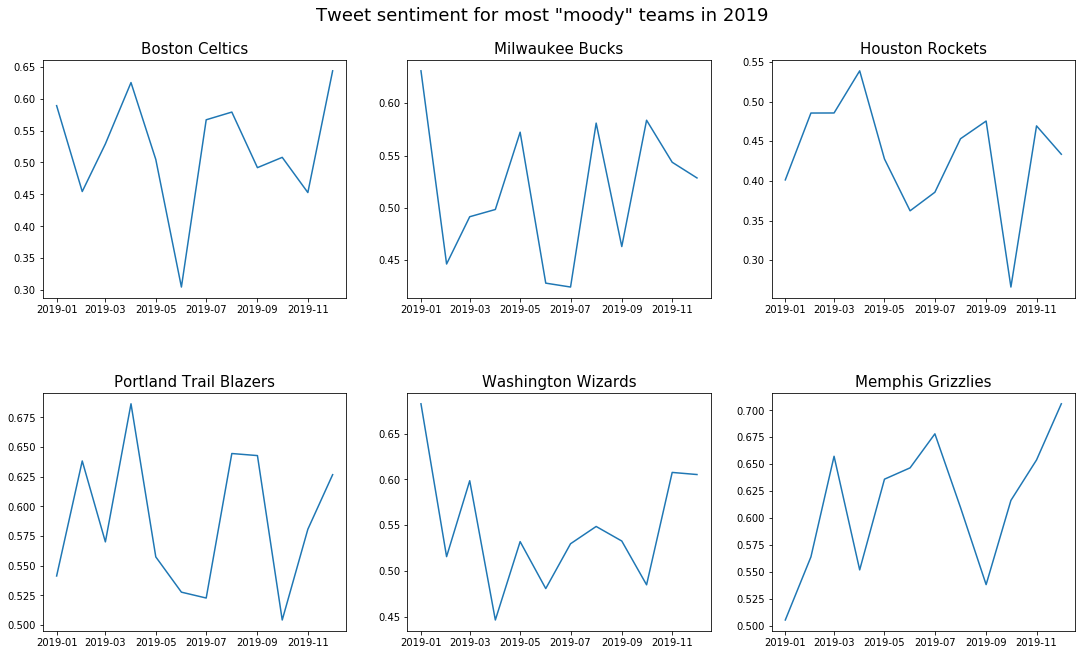

In [15]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(moody_teams)/3)), ncols=3)
fig.subplots_adjust(hspace=.4)
fig.suptitle('Tweet sentiment for most "moody" teams in 2019', fontsize=18, y=0.95)
fig.set_size_inches(18.5, 10.5)

for ax, team in zip(axes.flatten(), moody_teams):
    team_df = teams_month.loc[teams_month['team']==team]
    ax.plot(team_df.month, team_df['positive'])
    ax.set_title(f'{team}', size=15)

The plots above show the 6 moodiest fanbases and how their sentiment changed from month to month. The y-axis shows the percentage of positive tweets. <br>
To make these plots a bit more interesting we can include the winning percentage in each month as well with the hypothesis that the more you win, the happier you are. 

## Getting teams' winning percentages
In order to join the winning percentage to the general sentiment level we have to get the game results from somewhere. Luckily there is a great and easy to use library: [Basketball Reference Web Scraper](https://github.com/jaebradley/basketball_reference_web_scraper).
Since the NBA season starts in October and runs until the middle of the year, we need to scrape both the season 2018/19 and 2019/20 games and then subset for the games that were played throughout 2019.<br>
Below we just bring everything in the right format to easily plot the winning percentage per month against the sentiment level.

In [9]:
# Get all games for 2018/19 and 2019/20 season
fl_first_half = json.loads(client.season_schedule(season_end_year=2019, output_type=OutputType.JSON))
fl_second_half = json.loads(client.season_schedule(season_end_year=2020, output_type=OutputType.JSON))

In [10]:
all_fixtures = pd.concat([pd.DataFrame(fl_first_half), pd.DataFrame(fl_second_half)])

In [11]:
all_fixtures.head()

,away_team,away_team_score,home_team,home_team_score,start_time
0,PHILADELPHIA 76ERS,87.0,BOSTON CELTICS,105.0,2018-10-17T00:00:00+00:00
1,OKLAHOMA CITY THUNDER,100.0,GOLDEN STATE WARRIORS,108.0,2018-10-17T02:30:00+00:00
2,MILWAUKEE BUCKS,113.0,CHARLOTTE HORNETS,112.0,2018-10-17T23:00:00+00:00
3,BROOKLYN NETS,100.0,DETROIT PISTONS,103.0,2018-10-17T23:00:00+00:00
4,MEMPHIS GRIZZLIES,83.0,INDIANA PACERS,111.0,2018-10-17T23:00:00+00:00


In [12]:
def create_game_rows(row):
    team_rows = [
        {'team': row['away_team'],
         'opponent': row['home_team'],
         'won': row['away_team_score']>row['home_team_score'],
         'date': row['start_time']},
        {'team': row['home_team'],
         'opponent': row['away_team'],
         'won': row['away_team_score']<row['home_team_score'],
         'date': row['start_time']}
    ]
    return team_rows
    

In [13]:
games_list = []
for i, row in all_fixtures.iterrows():
    games_list.extend(create_game_rows(row))

games_df = (pd.DataFrame(games_list)
        .assign(month=lambda df: df['date'].astype('datetime64[M]'))
        .query("date > '2019-01-01' & date < '2020-01-01'")
        .reset_index(drop=True)
        .assign(opponent=lambda df: df['opponent'].apply(lambda x: x.title()))
        .assign(team=lambda df: df['team'].apply(lambda x: x.title())))

winning_percentage = games_df.groupby(['month', 'team'], as_index=False)['won'].mean()
display(winning_percentage.head())
sentiment_wp = pd.merge(teams_month, winning_percentage, on=['month', 'team'], how='left')

,month,team,won
0,2019-01-01,Atlanta Hawks,0.357143
1,2019-01-01,Boston Celtics,0.687500
2,2019-01-01,Brooklyn Nets,0.785714
3,2019-01-01,Charlotte Hornets,0.428571
4,2019-01-01,Chicago Bulls,0.133333


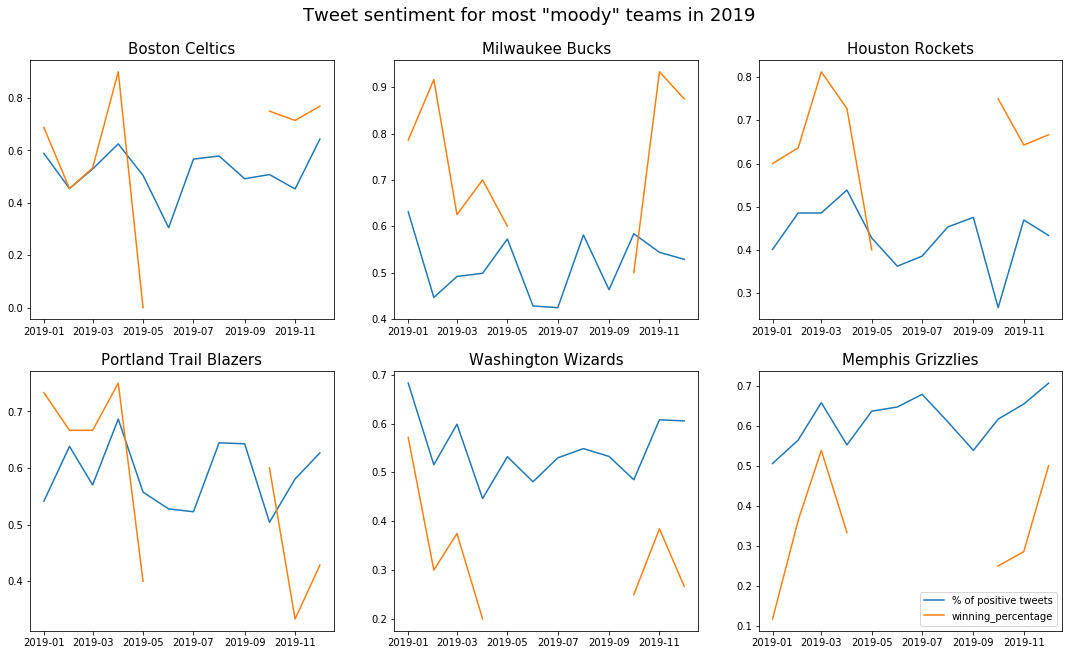

In [14]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(moody_teams)/3)), ncols=3)
fig.subplots_adjust(hspace=.2)
fig.suptitle('Tweet sentiment for most "moody" teams in 2019', fontsize=18, y=.95)
fig.set_size_inches(18.5, 10.5)
# fig.tight_layout()

for ax, team in zip(axes.flatten(), moody_teams):
    team_df = sentiment_wp.loc[sentiment_wp['team']==team]
    ax.plot(team_df.month, team_df['positive'], label='% of positive tweets')
    ax.plot(team_df.month, team_df['won'], label='winning_percentage')
    ax.set_title(f'{team}', size=15)
plt.legend()
plt.show()
# if second y axis:
#     ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
#     ax2.set_ylabel('')
#     ax2.set_yticks([])
#     ax2.plot(team_df.month, team_df['won'], label='winning_percentage', color='orange')


For most of these teams the winning percentage as well as the percentage of positive tweets seems to strongly correlate or follow each other.<br>
But it's definitely not perfect. It is interesting however to check out the teams that made it into the playoffs which were played from mid April till June (although none of the teams were long made it until June).
The Celtics, Bucks, Rockets and Trail Blazers all made it into the playoffs, with the Rockets and Celtics even hoping to reach the finals. Of course their winning percentage will take a hit, since it's not as easy to win in the Playoffs as it is during the regular season. However for all teams we can clearly see when they get eiminated and the sentiment drops together with their chances to win a title.<br>
Another interesting case are the Washington Wizards who lost their key players to injury during the winter, letting their winning percentage drop a lot and - in very similar movements - the positivity of their fanbase.<br>

Overall the results seem quite promising. Full disclosure: the overall correlation between winning percentage and the sentiment is quite low at only 0.2. So maybe we're just looking at charts and then making up stories that fit. On the other hand there might be some potential, since we can definitely improve on the classifier's accuracy if we train on a humanly labelled dataset. 